## This notebook explores the analysis of indian startup funding and basically gives answer of following questions :-
1.  How does the funding ecosystem change with time ?(Number of funding per month)
2. How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)
3. Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?
4. Do cities play a major role in funding ? (OR) Which city has maximum startups ?
5. Who is the important investors in the Indian Ecosystem?
6. What are different types of funding for startups ?

In [56]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
color = sns.color_palette()

import regex as re
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999

## Obtaining the data

In [57]:
funding_data = pd.read_csv("./indian-startup-funding/startup_funding.csv")
funding_data.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,Remarks
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000",NaN
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000",NaN
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000",NaN
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000",NaN
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000",NaN


### Column names of the table

In [58]:
funding_data.columns

Index(['Sr No', 'Date ddmmyyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investorsxe2x80x99 Name',
       'InvestmentnType', 'Amount in USD', 'Remarks'],
      dtype='object')

In [59]:
print("Size of data(Rows, Columns)",funding_data.shape)

Size of data(Rows, Columns) (3009, 10)


**Lets see How much data is missing**

In [60]:
# missing data 
total = funding_data.isnull().sum().sort_values(ascending = False)
percent = ((funding_data.isnull().sum()/funding_data.isnull().count())*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
missing_data.head()

,Total,Percent %
Remarks,2590,86.075108
Amount in USD,960,31.904287
SubVertical,936,31.106680
City Location,180,5.982054
Industry Vertical,171,5.682951


Deleting "**Remarks**" from table and displaying remaining data

In [61]:
del funding_data["Remarks"]
funding_data.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,"4,500,000"
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,"3,300,000"
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,"6,000,000"
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,"5,000,000"
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,"18,000,000"


Now convert the string **"Amount in USD"** into numeric

First step: finding all the **anomalies**

In [62]:
funding_data["Amount in USD"].unique()

array(['4,500,000', '3,300,000', '6,000,000', '5,000,000', '18,000,000',
       '10,00,000', '10,000,000', '450,000,000', '20,000,000',
       '1,600,000', '140,000,000', '38,080,000', '125,000,000',
       '11,000,000', '51,000,000', '37,000,000', '500,000', '110,000,000',
       '15,000,000', '6,590,000', 'Undisclosed', '70,000,000',
       '3,900,000,000', '19,000,000', '2,500,000', '145,000', '1,000,000',
       '150,000,000', '60,000,000', '16,000,000', '5,750,000', '319,605',
       '5,10,00,000', '1,00,00,000', '48,89,975.54', '90,00,000',
       '7,50,00,000', '26,000,000', '25,00,000', '27,39,034.68',
       '1,51,09,500.00', '4,30,200', '1,55,00,000', '5,20,00,000',
       '35,84,000', '3,400,000', 'undisclosed', '868,600', '50,000,000',
       '14,00,00,000', '1,15,00,000', '56,00,000', '45,000,000',
       '17,000,000', '430,665', '3,591,375', '200,000', '3,500,000',
       '6,320,820', '2,443,495', '307,000', '3,000,000', '14,342,000+',
       '226,000,000', '600,000', '10

Found several non-numerical values: *'undisclosed'*, *'Undisclosed'*, *'\\\\\\\\xc2\\\\\\\\\xa0------' html encoding error* 


Removing them with the help of **Regular Expressions**

In [63]:
funding_data["Amount in USD"][funding_data["Amount in USD"].str.contains('undisclosed', flags=re.IGNORECASE, regex=True, na = False)] = '0'

In [64]:
funding_data["Amount in USD"] = funding_data["Amount in USD"].apply(lambda x: re.sub('^\\\\\\\\\\\\\\\\xc2\\\\\\\\\\\\\\\\xa0','',str(x)))
funding_data["Amount in USD"] = funding_data["Amount in USD"].apply(lambda x: re.sub('\D+','',str(x)))
#funding_data["Amount in USD"] = funding_data["Amount in USD"].apply(lambda x: float(str(x).replace(",","")))
funding_data["Amount in USD"] = pd.to_numeric(funding_data["Amount in USD"])
funding_data.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0


## Ques 1:  How does the funding ecosystem change with time ?(Number of funding per month)

Clean the **'Date ddmmyyyy'** column

In [65]:
print("Percentage in correct format: ",funding_data['Date ddmmyyyy'].str.contains('^([1-9]|0[1-9]|[12][0-9]|3[01])[/]([1-9]|0[1-9]|1[012])[/](19|20)\d\d$', regex = True).sum()/funding_data['Date ddmmyyyy'].str.contains('^([1-9]|0[1-9]|[12][0-9]|3[01])[/]([1-9]|0[1-9]|1[012])[/](19|20)\d\d$', regex = True).count())
print("Count of incorret dates: ",3009 - funding_data['Date ddmmyyyy'].str.contains('^([1-9]|0[1-9]|[12][0-9]|3[01])[/]([1-9]|0[1-9]|1[012])[/](19|20)\d\d$', regex = True).sum())

Percentage in correct format:  0.997341309405118
Count of incorret dates:  8


So **99.73%** dates are in correct format, and **8** dates have some errors

In [66]:
for i in range(0,len(funding_data['Date ddmmyyyy'])):
    if not re.match('^([1-9]|0[1-9]|[12][0-9]|3[01])[/]([1-9]|0[1-9]|1[012])[/](19|20)\d\d$',funding_data['Date ddmmyyyy'][i]):
        funding_data['Date ddmmyyyy'][i] = re.sub('\D+','/',funding_data['Date ddmmyyyy'][i])
        print(funding_data['Date ddmmyyyy'][i])

05/072018
01/07/015
/2/010/7/2015
12/05/2015
12/05/2015
13/04/2015
15/01/2015
22/01/2015


In [67]:
### Some more fixes in the data format. Will try to fix in the input file in next version #
funding_data['Date ddmmyyyy'][funding_data['Date ddmmyyyy']=='05/072018'] = '05/07/2018'
funding_data['Date ddmmyyyy'][funding_data['Date ddmmyyyy']=='01/07/015'] = '01/07/2015'
funding_data['Date ddmmyyyy'][funding_data['Date ddmmyyyy']=='/2/010/7/2015'] = '10/07/2015'
funding_data['Date ddmmyyyy'][funding_data['Date ddmmyyyy']=='22/01//2015'] = '22/01/2015'
funding_data["yearmonth"] = (pd.to_datetime(funding_data['Date ddmmyyyy'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(funding_data['Date ddmmyyyy'],format='%d/%m/%Y').dt.month)
temp = funding_data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201606     98
201508     98
201507     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


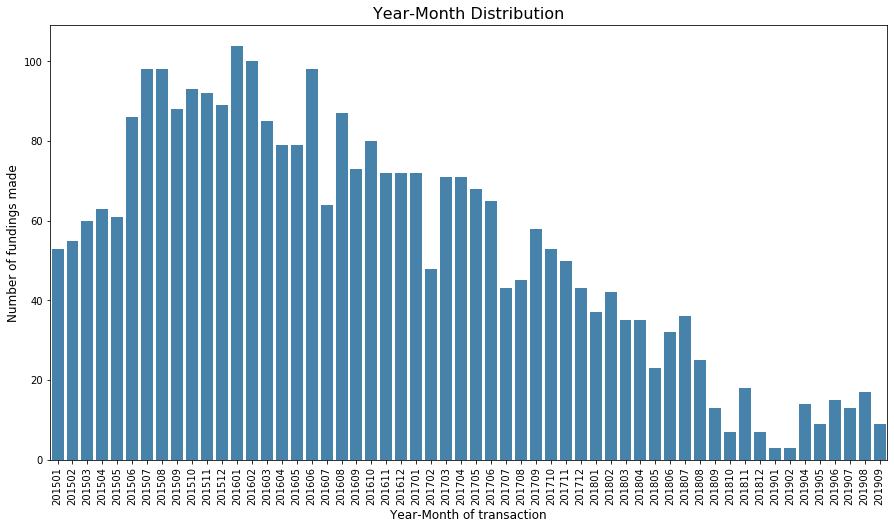

In [68]:
year_month = funding_data['yearmonth'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(year_month.index, year_month.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

As we can see that startups got more funding in **January 2016**(Total funding in January 2016 are 104). Above visualization shows how funding
varies from one month to another.

## Ques 2 : How much funds does startups generally get in India ?(maximum funding, minimum funding , average funding and number of fundings)


In [69]:
print("Maximum funding to a Startups is : ",funding_data["Amount in USD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [70]:
funding_data[funding_data.loc[:,"Amount in USD"] == 3900000000.0]

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,yearmonth
25,26,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09,201908


In [72]:
funding_data[funding_data.loc[:,"Startup Name"] == 'Paytm']

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,yearmonth
216,218,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
795,799,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1458,1482,30/8/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2424,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2855,2902,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,201503
2913,2961,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,NaN,201502


Identifying least funding startups

In [77]:
print("Minimum funding to a Startups is : ",funding_data["Amount in USD"][(funding_data.loc[:,"Amount in USD"] != 0) & (funding_data.loc[:,"Amount in USD"] != 20)].dropna().sort_values().min())

Minimum funding to a Startups is :  16000.0


In [79]:
funding_data[funding_data.loc[:,"Amount in USD"] == 16000.0]

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,yearmonth
2982,3031,19/01/2015,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2983,3032,19/01/2015,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2984,3033,19/01/2015,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2985,3034,19/01/2015,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501
2986,3035,19/01/2015,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,16000.0,201501


Now as we can see **Hostel Dunia, Play your sport, Yo Grad, Enabli and CBS** are least funded Startups i.e, 16000 USD

In [80]:
print("On Average indian startups got funding of : ",funding_data["Amount in USD"][(funding_data.loc[:,"Amount in USD"] != 0) & (funding_data.loc[:,"Amount in USD"] != 20)].dropna().sort_values().mean())

On Average indian startups got funding of :  22095648.459313724


On an Average indian startups got funding of : **22095648.459313724**

Total startups funded :  2439
Ola Cabs     8
Swiggy       8
NoBroker     6
UrbanClap    6
Nykaa        6
Meesho       6
Paytm        6
Medinfi      6
Uniphore     5
Toppr        5
Name: Startup Name, dtype: int64


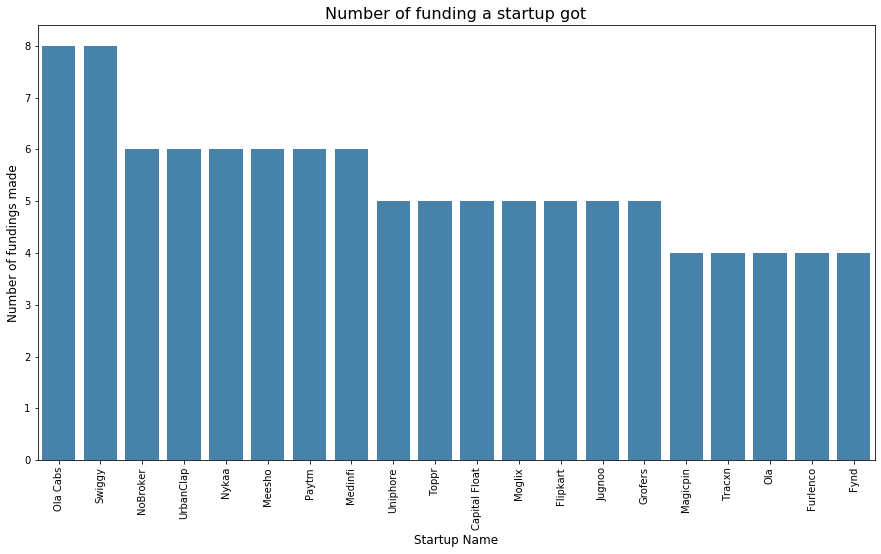

In [81]:
print("Total startups funded : ", len(funding_data["Startup Name"].unique()))
print(funding_data["Startup Name"].value_counts().head(10))
startupname = funding_data['Startup Name'].value_counts().head(20)
plt.figure(figsize=(15,8))
sns.barplot(startupname.index, startupname.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=16)
plt.show()

As we can see that **Ola and Swiggy** got maximum number of fundings(Total funding = 7) and total there are 3009 indian startups funded from January 2015 to September 2019. The above visulization is only for Top 20 startups.

## Ques 3 :  Which industries are favored by investors for funding ? (OR) Which type of companies got more easily funding ?

Consumer Internet    941
Technology           476
eCommerce            186
Healthcare            69
ECommerce             61
Finance               61
Logistics             31
E-Commerce            25
Food & Beverage       23
Education             22
Name: Industry Vertical, dtype: int64


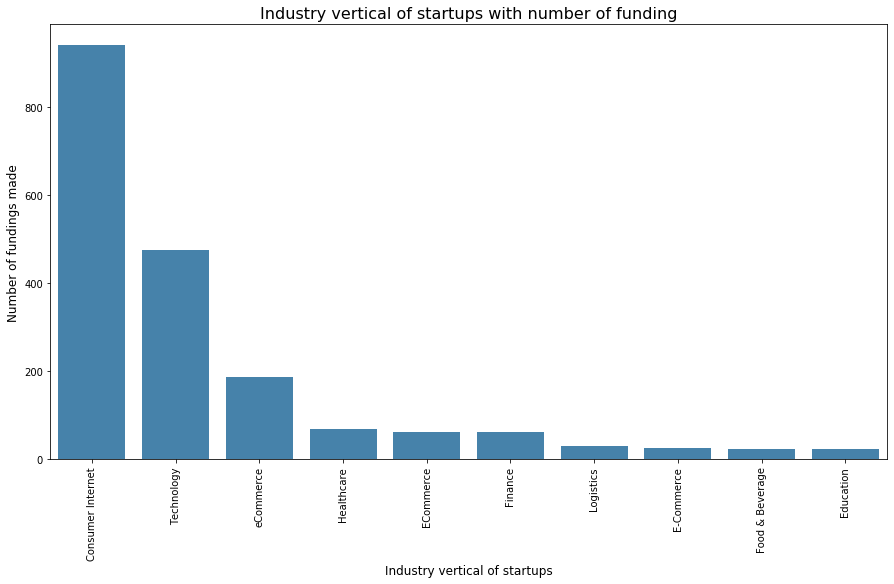

In [82]:
industry = funding_data['Industry Vertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

If we see Above **"Consumer Internet"** got maximum number of fundings, i.e. 941 followed by technology and E-Commerce.

Online Lending Platform      11
Online Pharmacy              10
Food Delivery Platform        8
Online Lending                5
Online Learning Platform      5
Education                     5
Online lending platform       5
Online Education Platform     5
Online Food Delivery          4
SaaS                          3
Name: SubVertical, dtype: int64


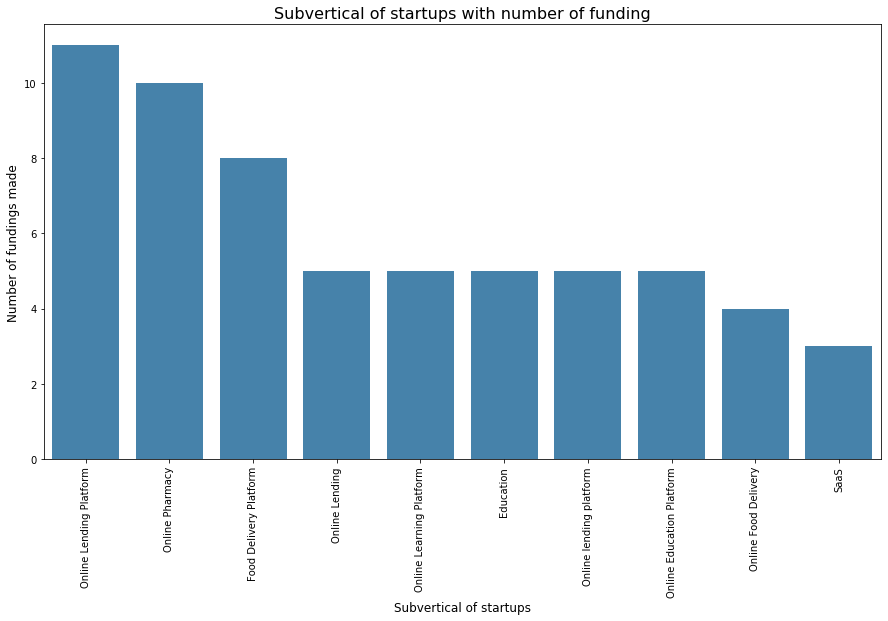

In [83]:
industry = funding_data['SubVertical'].value_counts().head(10)
print(industry)
plt.figure(figsize=(15,8))
sns.barplot(industry.index, industry.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

In Subcategores, **"Online Lending Platform"** got maximim number of fundings.

## Ques 4 : Do cities play a major role in funding ? (OR) Which city has maximum startups ?


Bangalore    700
Mumbai       564
New Delhi    420
Gurgaon      277
Bengaluru    132
Pune         103
Hyderabad     99
Chennai       96
Noida         90
Gurugram      50
Name: City  Location, dtype: int64


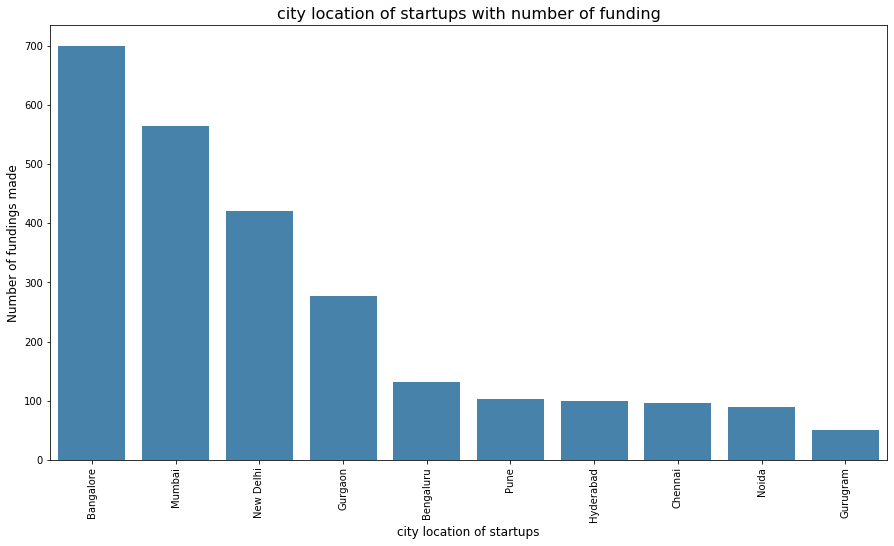

In [86]:
city = funding_data['City  Location'].value_counts().head(10)
print(city)
plt.figure(figsize=(15,8))
sns.barplot(city.index, city.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

**Distribution of startups across Top different cities**

In [87]:
#plt.figure(figsize=(15,8))
#count = funding_data['City  Location'].value_counts()
#squarify.plot(sizes=count.values,label=count.index, value=count.values)
#plt.title('Distribution of Startups across Top cities')

We can see **Bangalore** attracts more number of investotrs followed by **Mumbai** and **New** **Delhi**

## Ques 5 : Who are the most important investors in the Indian Ecosystem?


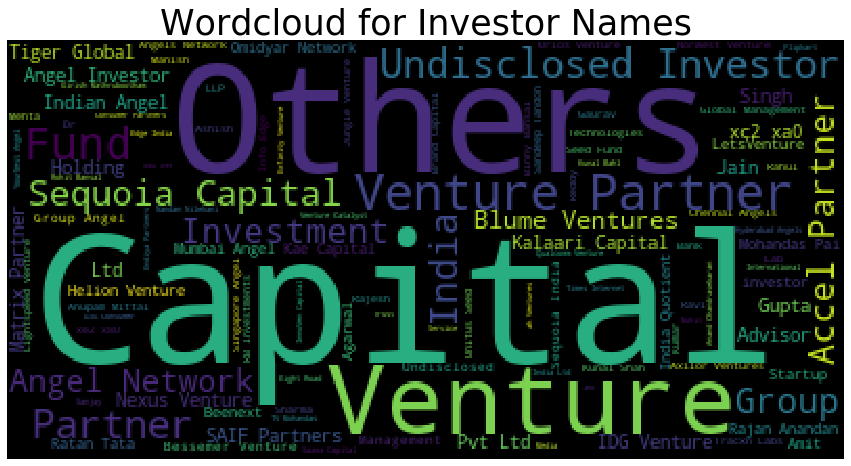

In [98]:
from wordcloud import WordCloud

names = funding_data["Investorsxe2x80x99 Name"][~pd.isnull(funding_data["Investorsxe2x80x99 Name"])]
#print(names)
wordcloud = WordCloud().generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

In [114]:
funding_data['Investorsxe2x80x99 Name'][funding_data['Investorsxe2x80x99 Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
funding_data['Investorsxe2x80x99 Name'][funding_data['Investorsxe2x80x99 Name'] == 'undisclosed Investors'] = 'Undisclosed Investors'
funding_data['Investorsxe2x80x99 Name'][funding_data['Investorsxe2x80x99 Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
funding_data['Investorsxe2x80x99 Name'][funding_data['Investorsxe2x80x99 Name'] == 'Undisclosed investor'] = 'Undisclosed Investors'
funding_data['Investorsxe2x80x99 Name'][funding_data['Investorsxe2x80x99 Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
funding_data['Investorsxe2x80x99 Name'][funding_data['Investorsxe2x80x99 Name'] == 'Undisclosed'] = 'Undisclosed Investors'
funding_data['Investorsxe2x80x99 Name'][funding_data['Investorsxe2x80x99 Name'] == 'Undisclosed Investorsinvestors'] = 'Undisclosed Investors'

Undisclosed Investors       112
Ratan Tata                   25
Indian Angel Network         23
nan                          23
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
Name: Investorsxe2x80x99 Name, dtype: int64


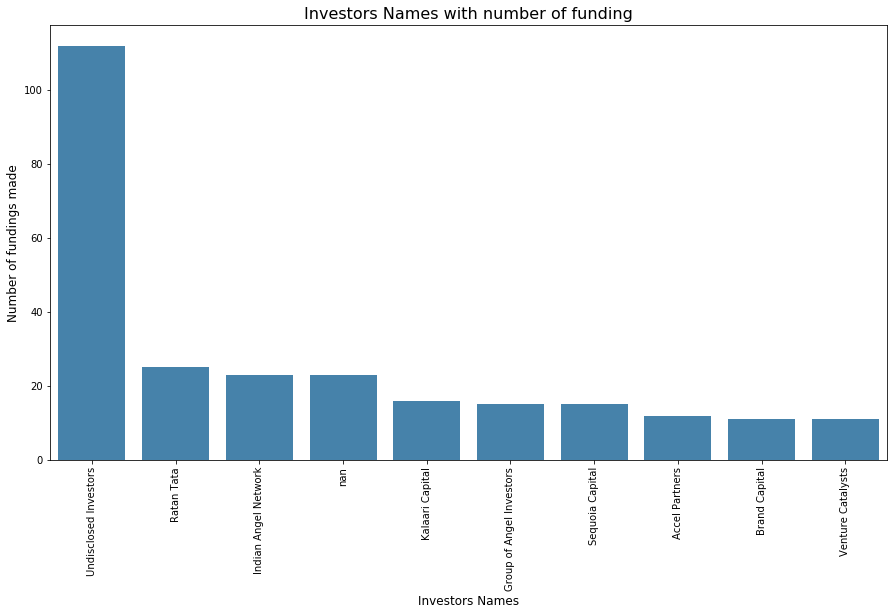

In [116]:
investors = funding_data['Investorsxe2x80x99 Name'].dropna().value_counts().head(10)
print(investors)
plt.figure(figsize=(15,8))
sns.barplot(investors.index, investors.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

**Ratan tata** funded maximum number of startups followed by **Indian Angel Network**.

## Ques 6 : What are different types of funding for startups ?

In [119]:
investment = funding_data['InvestmentnType'].value_counts()
print(investment)

Private Equity                 1356
Seed Funding                   1353
Seed/ Angel Funding              60
Seed / Angel Funding             47
Seed\\nFunding                   30
Seed/Angel Funding               23
Debt Funding                     22
Series A                         22
Series B                         15
Series C                         11
Series D                          9
Angel / Seed Funding              8
Pre-Series A                      4
Seed Round                        4
Seed / Angle Funding              3
Venture Round                     2
pre-Series A                      2
Private Equity Round              2
Equity                            2
Corporate Round                   1
Private\\nEquity                  1
Structured Debt                   1
Seed Funding Round                1
Crowd Funding                     1
Bridge Round                      1
Pre Series A                      1
Debt-Funding                      1
Venture - Series Unknown    

In [129]:
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'SeedFunding'] = 'Seed Funding'
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'Seed/ Angel Funding'] = 'Seed Funding'
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'Seed / Angel Funding'] = 'Seed Funding'
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'Seed\\\\nFunding'] = 'Seed Funding'
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'Seed/Angel Funding'] = 'Seed Funding'
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'Angel / Seed Funding'] = 'Seed Funding'
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'Seed / Angle Funding'] = 'Seed Funding'
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'Private\\\\\\\\nEquity'] = 'Private Equity'

funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'Crowd funding'] = 'Crowd Funding'
funding_data['InvestmentnType'][funding_data['InvestmentnType'] == 'PrivateEquity'] = 'Private Equity'


Seed Funding                   1524
Private Equity                 1357
Debt Funding                     22
Series A                         22
Series B                         15
Series C                         11
Series D                          9
Seed Round                        4
Pre-Series A                      4
Private Equity Round              2
Crowd Funding                     2
pre-Series A                      2
Equity                            2
Venture Round                     2
Seed                              1
Mezzanine                         1
Venture - Series Unknown          1
Series F                          1
Single Venture                    1
Debt-Funding                      1
Bridge Round                      1
Structured Debt                   1
Series E                          1
Maiden Round                      1
Term Loan                         1
Series B (Extension)              1
Seed Funding Round                1
Pre Series A                

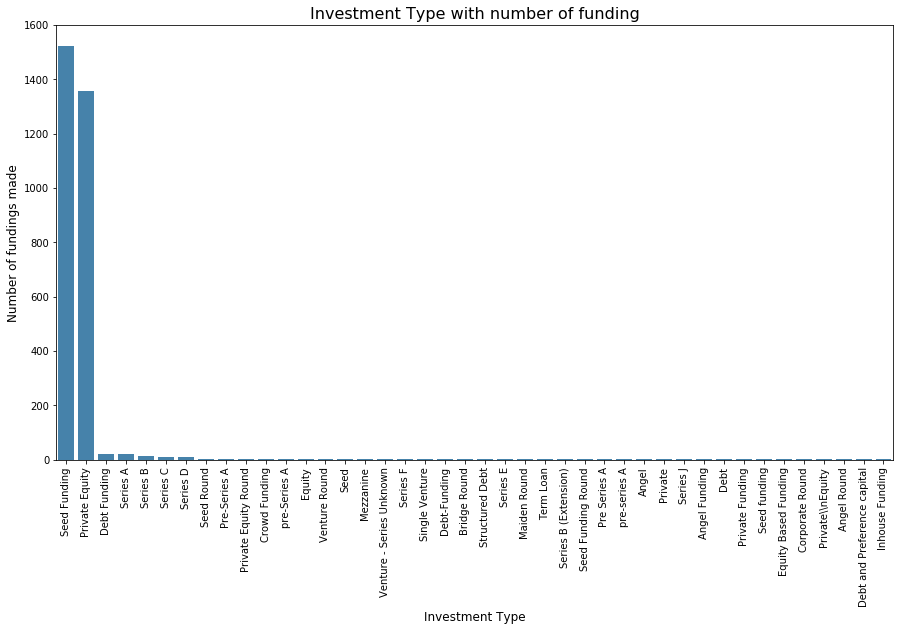

In [130]:
investment = funding_data['InvestmentnType'].value_counts()
print(investment)
plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

In [131]:
temp = funding_data["InvestmentnType"].value_counts()
labels = temp.index
sizes = (temp / temp.sum())*100
trace = go.Pie(labels=labels, values=sizes, hoverinfo='label+percent')
layout = go.Layout(title='Types of investment funding with %')
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="BorrowerGender")

We can see **Seed Funding** is in **Top** followed by Private Equity.

 # Now, preprocess the data

In [132]:
funding_data.head()

,Sr No,Date ddmmyyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investorsxe2x80x99 Name,InvestmentnType,Amount in USD,yearmonth
0,0,05/09/2019,FPL Technologies,FinTech,Financial Services,Pune,"Matrix Partners India, Sequoia India",Maiden Round,4500000.0,201909
1,1,04/09/2019,Cashflo,FinTech,Invoice discounting platform and SME lending m...,Mumbai,SAIF Partners,Series A,3300000.0,201909
2,2,04/09/2019,Digital F5,"Advertising, Marketing",Digital marketing firm,Mumbai,TIW Private Equity,Private Equity Round,6000000.0,201909
3,3,04/09/2019,3rdFlix,SaaS,Education Technology,Hyderabad,Exfinity Venture Partners,pre-series A,5000000.0,201909
4,4,04/09/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000.0,201909
